<a href="https://colab.research.google.com/github/zuhaib786/TF_Learning_Notebooks/blob/main/Classification_and_Basics_of_Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -qq datasets
!pip install -qq transformers

In [2]:
from datasets import list_datasets

In [3]:
all_datasets = list_datasets()
print(f"There are {len(all_datasets)} datasets currently available on the Hub")
print(f"The first 10 are: {all_datasets[:10]}")

There are 11140 datasets currently available on the Hub
The first 10 are: ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [4]:
from datasets import load_dataset
emotions = load_dataset("emotion")

  0%|          | 0/3 [00:00<?, ?it/s]

In [5]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [6]:
train_ds = emotions['train']

In [7]:
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [8]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [9]:
print(train_ds.features)
print(train_ds[:5])

{'text': Value(dtype='string', id=None), 'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}
{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy'], 'label': [0, 0, 3, 2, 3]}


In [10]:
emotions.set_format(type = "pandas")
df = emotions['train'][:]

In [11]:
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [12]:
def label_int2str(row):
  return emotions['train'].features['label'].int2str(row)
df['label_name'] = df['label'].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


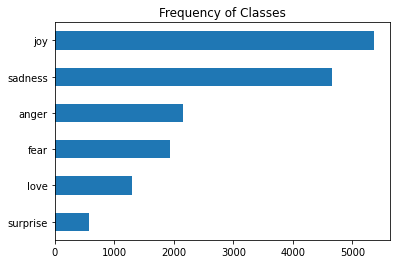

In [13]:
import matplotlib.pyplot as plt
df['label_name'].value_counts(ascending = True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


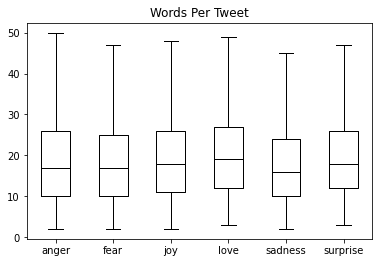

In [14]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by="label_name", grid=False,
showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [15]:
emotions.reset_format()

In [16]:
from transformers import AutoTokenizer
model_ckpt = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [17]:
text = "Tokenizing text is a core task of NLP."
encoded_text = tokenizer(text)

In [18]:
encoded_text

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [19]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)

In [20]:
tokens

['[CLS]',
 'token',
 '##izing',
 'text',
 'is',
 'a',
 'core',
 'task',
 'of',
 'nl',
 '##p',
 '.',
 '[SEP]']

In [21]:
tokenizer.convert_tokens_to_string(tokens)

'[CLS] tokenizing text is a core task of nlp. [SEP]'

In [22]:
print("Tokenizer vocabsize = " + str(tokenizer.vocab_size))
print("Tokenizer model max Length = " + str(tokenizer.model_max_length))
print(tokenizer.model_input_names)


Tokenizer vocabsize = 30522
Tokenizer model max Length = 512
['input_ids', 'attention_mask']


In [23]:
def tokenize(batch):
  return tokenizer(batch['text'], padding = True, truncation = True)

In [24]:
tokenize(emotions['train'][:2])

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [25]:
emotions_encoded = emotions.map(tokenize, batched = True, batch_size = None)

In [26]:
print(emotions_encoded['train'].column_names)

['text', 'label', 'input_ids', 'attention_mask']


In [27]:
import torch
from transformers import AutoModel
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [28]:
model = AutoModel.from_pretrained(model_ckpt).to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [29]:
text = 'this is a text'
inputs = tokenizer(text, return_tensors = 'pt')
print(f"Input tensor shape : {inputs['input_ids'].size()}")

Input tensor shape : torch.Size([1, 6])


In [30]:
inputs = {k:v.to(device) for k, v in inputs.items()}
with torch.no_grad():
  outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.2535, -0.1091,  0.0759,  ..., -0.1054,  0.2257,  0.4615],
         [-0.7154, -0.2742, -0.0954,  ..., -0.3597,  0.5174,  0.3450],
         [-0.4100, -0.2195,  0.1850,  ..., -0.0136,  0.1607,  1.0422],
         [-0.2523, -0.0254,  0.2472,  ..., -0.1637,  0.0865,  1.0516],
         [-0.0570, -0.1057,  0.0662,  ...,  0.0584,  0.1034,  0.2971],
         [ 0.9184,  0.1577, -0.4105,  ...,  0.1509, -0.7327, -0.1572]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [31]:
outputs.last_hidden_state.size()

torch.Size([1, 6, 768])

In [32]:
outputs.last_hidden_state[:,0].size()

torch.Size([1, 768])

In [33]:
def extract_hidden_states(batch):
  inputs = {k:v.to(device) for k, v in batch.items() if k in tokenizer.model_input_names} 
  with torch.no_grad():
    last_hidden_state = model(**inputs).last_hidden_state
    return {"hidden_state" : last_hidden_state[:, 0].cpu().numpy()}

In [34]:
emotions_encoded.set_format('torch',
                            columns = ['input_ids', 'attention_mask', 'label'])

In [35]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched= True)

  0%|          | 0/16 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [36]:
emotions_hidden['train'].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [37]:
import numpy as np
X_train = np.array(emotions_hidden['train']['hidden_state'])
X_valid = np.array(emotions_hidden['validation']['hidden_state'])
y_train = np.array(emotions_hidden['train']['label'])
y_valid = np.array(emotions_hidden['validation']['label'])
X_train.shape, y_train.shape

((16000, 768), (16000,))

In [38]:
!pip install umap-learn

In [40]:
from umap import UMAP
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
X_scaled = MinMaxScaler().fit_transform(X_train)
mapper = UMAP(n_components = 2, metric = 'cosine').fit(X_scaled)
df_emb = pd.DataFrame(mapper.embedding_, columns = ["X", "Y"])
df_emb['label'] = y_train
df_emb.head()

,X,Y,label
0,4.251975,6.862661,0
1,-3.085875,6.089611,0
2,4.938521,3.398426,3
3,-2.318838,3.952654,2
4,-3.336644,4.046591,3


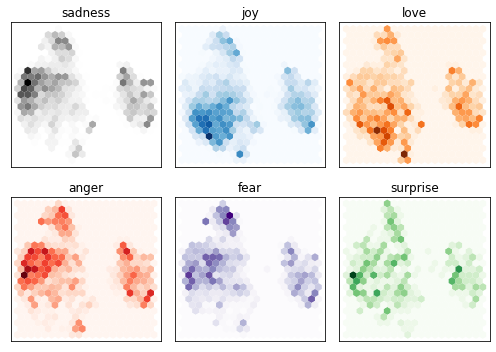

In [43]:
fig, axes = plt.subplots(2, 3, figsize = (7, 5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions['train'].features['label'].names
for i, (label, cmap) in enumerate(zip(labels, cmaps)):
  df_emb_sub  = df_emb.query(f"label == {i}")
  axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap = cmap, gridsize = 20, linewidths = (0,))
  axes[i].set_title(label)
  axes[i].set_xticks([]), axes[i].set_yticks([])
plt.tight_layout()
plt.show()

In [45]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(max_iter = 3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.633

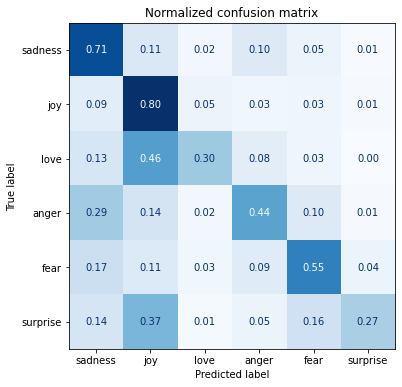

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
def plot_confusion_matrix(y_preds, y_true, labels):
  cm = confusion_matrix(y_true, y_preds, normalize = 'true')
  fig, ax = plt.subplots(figsize=(6, 6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
  plt.title("Normalized confusion matrix")
  plt.show()
y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

In [48]:
from transformers import AutoModelForSequenceClassification

num_labels = 6
model = (AutoModelForSequenceClassification.from_pretrained(
    model_ckpt,
    num_labels = num_labels, 
)).to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias', 'pre_classifier

In [49]:
from sklearn.metrics import accuracy_score, f1_score
def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average = "weighted")
  acc = accuracy_score(labels, preds)
  return {"accuracy" : acc, "f1" : f1}

In [51]:
from transformers import Trainer, TrainingArguments
batch_size = 64
logging_steps = len(emotions_encoded['train'])//batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args =  TrainingArguments(
    output_dir = model_name,
    num_train_epochs = 2,
    learning_rate = 2e-5,
    per_device_train_batch_size = batch_size,
    per_device_eval_batch_size = batch_size,
    weight_decay = 0.01,
    evaluation_strategy = 'epoch',
    disable_tqdm = False,
    logging_steps = logging_steps,
    push_to_hub = False,
    log_level = "error"
)

In [57]:
trainer = Trainer(
    model = model,
    args = training_args,
    compute_metrics = compute_metrics,
    train_dataset = emotions_encoded["train"],
    eval_dataset = emotions_encoded["validation"],
    tokenizer = tokenizer
)

In [58]:
trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.061300,0.169210,0.934500,0.934646
2,0.042300,0.179912,0.940000,0.940073


TrainOutput(global_step=500, training_loss=0.051780176162719724, metrics={'train_runtime': 234.5351, 'train_samples_per_second': 136.44, 'train_steps_per_second': 2.132, 'total_flos': 720342861696000.0, 'train_loss': 0.051780176162719724, 'epoch': 2.0})

In [59]:
preds_output = trainer.predict(emotions_encoded["validation"])

In [60]:
preds_output.metrics

{'test_loss': 0.17991183698177338,
 'test_accuracy': 0.94,
 'test_f1': 0.9400726096670999,
 'test_runtime': 4.7465,
 'test_samples_per_second': 421.365,
 'test_steps_per_second': 6.742}

In [61]:
y_preds = np.argmax(preds_output.predictions, axis=1)

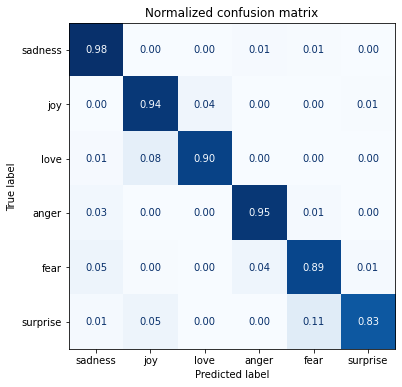

In [62]:
plot_confusion_matrix(y_preds, y_valid, labels)

In [69]:
from torch.nn.functional import cross_entropy
def forward_pass_with_label(batch):
  inputs = {k:v.to(device) for k, v in batch.items()  if k in tokenizer.model_input_names}
  with torch.no_grad():
    output = model(**inputs)
    pred_label = torch.argmax(output.logits, axis = -1)
    loss = cross_entropy(output.logits, batch['label'].to(device), reduction = "none")
  return {"loss" : loss.cpu().numpy(),
          "prediction_label" : pred_label.cpu().numpy()}

In [70]:
emotions_encoded.set_format("torch", columns = ["input_ids", "attention_mask", "label"])
emotions_encoded["validation"] = emotions_encoded["validation"].map(forward_pass_with_label, batched=True, batch_size=16)

  0%|          | 0/125 [00:00<?, ?ba/s]

In [73]:
emotions_encoded.set_format("pandas")
cols = ["text", "label", "prediction_label", "loss"]
df_test = emotions_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["prediction_label"] = (df_test["prediction_label"]
.apply(label_int2str))

In [74]:
df_test.sort_values("loss", ascending=False).head(10)

,text,label,prediction_label,loss
1801,i feel that he was being overshadowed by the s...,love,sadness,11.396358
1124,someone acting stupid in public,anger,sadness,9.937473
1500,i guess we would naturally feel a sense of lon...,anger,sadness,9.616632
415,im kind of embarrassed about feeling that way ...,love,sadness,9.150447
1836,i got a very nasty electrical shock when i was...,fear,anger,8.596138
1032,i began to feel woeful as i stared into the ab...,sadness,joy,7.872902
909,i cant stop the joyful tears from flowing as i...,love,joy,7.540988
177,im sure much of the advantage is psychological...,sadness,joy,7.435417
1367,that day i was alone at home after coming home...,fear,sadness,7.312665
799,i feel a sort of sweet relief when i look arou...,love,joy,7.303657
